In [26]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('C:/Users/Ruchi/OneDrive/Desktop/ml-1m/ml-1m/users.dat', sep='::', header=None, names=unames, engine='python', encoding = 'ISO-8859-1')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('C:/Users/Ruchi/OneDrive/Desktop/ml-1m/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python', encoding = 'ISO-8859-1')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:/Users/Ruchi/OneDrive/Desktop/ml-1m/ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding = 'ISO-8859-1')

In [112]:
#Merging the three tables into one to analyse the data better
data = pd.merge(pd.merge(ratings, users), movies)

### 1 : An aggregate on the number of rating done for each particular genre, e.g., Action, Adventure, Drama, Science Fiction, ...

In [113]:
data.groupby(['genres']).count()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title
genres,,,,,,,,,
Action,12311,12311,12311,12311,12311,12311,12311,12311,12311
Action|Adventure,10446,10446,10446,10446,10446,10446,10446,10446,10446
Action|Adventure|Animation,345,345,345,345,345,345,345,345,345
Action|Adventure|Animation|Children's|Fantasy,135,135,135,135,135,135,135,135,135
Action|Adventure|Animation|Horror|Sci-Fi,618,618,618,618,618,618,618,618,618
...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller|War,280,280,280,280,280,280,280,280,280
Sci-Fi|War,1367,1367,1367,1367,1367,1367,1367,1367,1367
Thriller,17851,17851,17851,17851,17851,17851,17851,17851,17851


### 2 : The top 5 ranked genres by women on most number of rating

In [114]:
female = data.loc[data['gender'] == 'F']

In [115]:
female.sort_values(['rating'], ascending=False).head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
399110,175,1343,5,977115555,F,25,2,95123,Cape Fear (1991),Thriller
399355,2609,1343,5,973725840,F,50,12,55391,Cape Fear (1991),Thriller
399335,2408,1343,5,974254826,F,45,1,01609,Cape Fear (1991),Thriller
399328,2322,1343,5,974465496,F,56,13,48105,Cape Fear (1991),Thriller


###  3 : The top 5 ranked genres by men on most number of rating

In [117]:
male = data.loc[data['gender'] == 'M']

In [118]:
male.sort_values(['rating'], ascending=False).head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
229230,1671,39,5,974712422,M,35,0,98368,Clueless (1995),Comedy|Romance
229333,2077,39,5,979972045,M,18,0,55112,Clueless (1995),Comedy|Romance
667100,5475,2248,5,960938844,M,25,4,94110,Say Anything... (1989),Comedy|Drama|Romance
667094,5421,2248,5,960154396,M,35,17,22030,Say Anything... (1989),Comedy|Drama|Romance


### 4 : Pick a genre of your choice and provide average movie’s ratings by the following four time intervals during which the movies were released 

##### A : 1970 to 1979

In [119]:
data['title']=data['title'].str.slice(-5,-1).astype('int')

In [148]:
a = data.loc[(data['genres'] == 'Horror') & (data['title'] >= 1970) & (data['title'] <= 1979)]
a['rating'].mean()

3.4600612301697744

##### B :  1980 to 1989

In [146]:
b = data.loc[(data['genres'] == 'Horror') & (data['title'] >= 1980) & (data['title'] <= 1989)]

In [147]:
b['rating'].mean()

2.929729141738279

##### C :  1990 to 1999

In [144]:
c = data.loc[(data['genres'] == 'Horror') & (data['title'] >= 1990) & (data['title'] <= 1999)]

In [145]:
c['rating'].mean()

2.790263367916999

###### D :  2000 to 2009

In [142]:
d = data.loc[(data['genres'] == 'Horror') & (data['title'] >= 2000) & (data['title'] <= 2009)]

In [143]:
d['rating'].mean()

2.235294117647059

### 5 : A function that given a genre and a rating_range (i.e. [3.5, 4]), returns all the movies of that genre and within that rating range sorted by average rating. Using an example, demonstrate that your function works

In [157]:
#Funtion that will return the list of movies based on the genre and the rating range.
def MovieList(genre, rating_range):
    
    rating_range = rating_range.lstrip ('[').rstrip (']')
    rating_one = float(rating_range.split(',')[0])
    rating_two = float(rating_range.split(',')[1])
    
    data['rating'] = data['rating'].astype(float)
    movie_list = data.loc[(data['genres'] == genre) & (data['rating'] >= rating_one) & (data['rating'] <= rating_two)]
    return movie_list

In [158]:
MovieList('Drama','[2.5,3.5]')

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
8,28,1193,3.0,978125194,F,25,1,14607,1975,Drama
11,42,1193,3.0,978038981,M,25,8,24502,1975,Drama
26,96,1193,3.0,977621789,F,25,16,78028,1975,Drama
47,191,1193,3.0,977026629,M,18,4,04915,1975,Drama
88,314,1193,3.0,976751458,F,56,9,46911,1975,Drama
...,...,...,...,...,...,...,...,...,...,...
1000141,4169,763,3.0,978663826,M,50,0,66048,1996,Drama
1000152,5147,530,3.0,962022697,M,18,0,48314,1994,Drama
1000156,4277,3336,3.0,985508256,M,35,16,98133,1961,Drama
1000157,6016,3336,3.0,995663888,M,45,1,37209,1961,Drama


### 6 : Present one other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

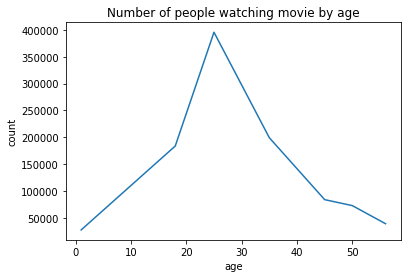

In [188]:
age_data = data['age'].value_counts()
age_data = pd.DataFrame(age_data).reset_index()
age_data.columns = ['age','count']
age_data['age'] = dataA['age'].astype(int)
age_data = age_data.sort_values(['age'],ascending=False)

plt.figure()
plt.plot(age_data['age'],age_data['count'])
plt.title('Number of people watching movie by age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Here we can see that the people from age group 20-28/30 watch the most number of movies than any other age group

In [175]:
age_range = data.age.unique()
age_range.sort()
age_groups = {
    1: 'Under 18', 
    18: 'Under 18', 
    25: '19 to 45', 
    35: '19 to 45', 
    45: '19 to 45', 
    50: '45 and Above',
    56: '45 and Above'
}

data['age_group'] = [age_groups[x] for x in data['age']]

In [176]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,1,1193,5.0,978300760,F,1,10,48067,1975,Drama,Under 18
1,2,1193,5.0,978298413,M,56,16,70072,1975,Drama,45 and Above
2,12,1193,4.0,978220179,M,25,12,32793,1975,Drama,19 to 45
3,15,1193,4.0,978199279,M,25,7,22903,1975,Drama,19 to 45
4,17,1193,5.0,978158471,M,50,1,95350,1975,Drama,45 and Above


In [177]:
#Calculating the avg of the different age groups for ratings

avg = data.pivot_table('rating', index = 'genres', columns = 'age_group', aggfunc = 'mean')

In [178]:
avg

age_group,19 to 45,45 and Above,Under 18
genres,,,
Action,3.353701,3.539648,3.252440
Action|Adventure,3.679165,3.744777,3.636162
Action|Adventure|Animation,4.063415,3.857143,4.317460
Action|Adventure|Animation|Children's|Fantasy,2.632353,3.222222,2.706897
Action|Adventure|Animation|Horror|Sci-Fi,3.560417,3.772727,3.448276
...,...,...,...
Sci-Fi|Thriller|War,3.348958,3.632353,3.650000
Sci-Fi|War,4.433551,4.488584,4.478261
Thriller,3.566027,3.731510,3.412794


We calculated the average rating for people in particular age group and most of them seem to have similar ratings for the genres. Expect the Under 18, where they rated the Action|Adventure genre low which is around 2.